In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import
import pandas as pd #importing data and data handling
import matplotlib.pyplot as plt #importing matplotlib for plotting
import seaborn as sns #importing seaborn library for easier plotting
import numpy as np #some data tronsformations
import datetime #importing datetime

In [3]:
# reading data
spotify_data = pd.read_csv("/content/drive/MyDrive/Capstone/Spotifydata_NEW.csv") 

In [34]:
# input track and artist
track_name = input("Track: ")
artist_name = input("By: ")

Track: Magic
By: Coldplay


In [35]:
# find selected song
selected_song = spotify_data[(spotify_data['track'] == track_name) & (spotify_data['artist'] == artist_name)]

In [36]:
# decade variable for comparison
decade = selected_song['decade'].values[0]

In [39]:
# top songs for each deacade
variables = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
                 'Liveness', 'Valence', 'Chorus_Hit', 'Sections']
bohemian_rhapsody_values = [-9.961, 0.392, 0.402, 0.0536, 0.288, 0, 0.243, 0.228, 28.92143, 17]
billie_jean_values = [0.92, 0.654, -3.051, 0.0401, 0.0236, 0.0158, 0.0359, 0.847, 29.591, 14]
houston_values = [0.306, 0.214, -12.518, 0.0356, 0.844, 0.053, 0.0839, 0.108, 34.67, 11]
uptown_values = [0.856, 0.609, -7.223, 0.0824, 0.00801, 8.15e-05, 0.0344, 0.928, 33.16138, 9]
outkast_values = [0.728, 0.974, -2.261, 0.0665, 0.103, 0.000532, 0.175, 0.965, 102.0471, 9]
rolling_stones_values = [0.723, 0.863, -7.89, 0.0338, 0.0383, 0.0317, 0.128, 0.931, 27.49737, 11]

In [40]:
# retrieve values for input song
input_song_values = []
for variable in variables:
  value = selected_song.loc[selected_song['track'] == track_name, variable.lower().replace(' ', '_')].values[0]
  input_song_values.append(value)


<ipython-input-41-89bbb32f5f17>:52: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


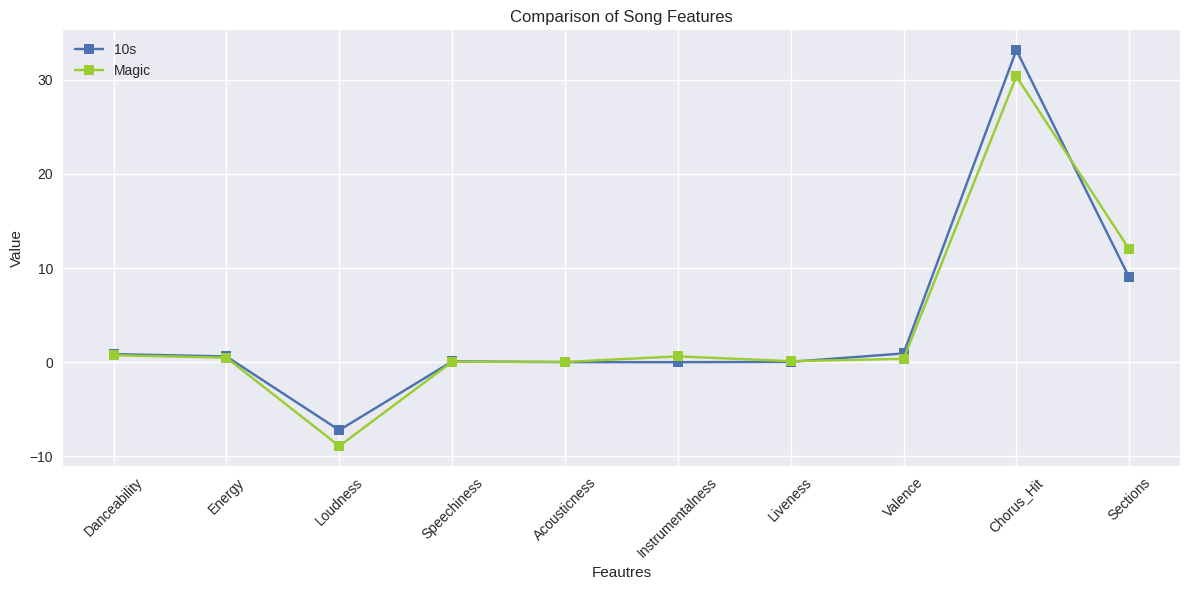

In [41]:
# create graph
x = np.arange(len(variables))
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the lines for each song
if decade == 2010:
    plt.plot(x, uptown_values, marker='s', label='10s')
elif decade == 2000:
    plt.plot(x, outkast_values, marker='s', label='00s')
elif decade == 1990:
    plt.plot(x, houston_values, marker='s', label='90s')
elif decade == 1980:
    plt.plot(x, billie_jean_values, marker='s', label='80s')
elif decade == 1970:
    plt.plot(x, bohemian_rhapsody_values, marker='s', label='70s')
elif decade == 1960:
    plt.plot(x, rolling_stones_values, marker='s', label='60s')

plt.plot(x, input_song_values, marker='s', label=track_name, color='yellowgreen')

ax.set_xlabel('Features')
ax.set_ylabel('Value')
ax.set_title('Comparison of Song Features')
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=45)
ax.legend()

## Add labels to data points
def label_points(x, y, label, ax):
    # for i, (xi, yi) in enumerate(zip(x, y)):
       # ax.annotate(label[i], (xi, yi), textcoords="offset points", xytext=(10, 20), ha='center')
    pass

label_points(x, input_song_values, input_song_values, ax)
if decade == 2010:
  label_points(x, uptown_values, uptown_values, ax)
elif decade == 2000:
  label_points(x, outkast_values, outkast_values, ax)
elif decade == 1990:
  label_points(x, houston_values, houston_values, ax)
elif decade == 1980:
  label_points(x, billie_jean_values, billie_jean_values, ax)
elif decade == 1970:
  label_points(x, bohemian_rhapsody_values, bohemian_rhapsody_values, ax)
elif decade == 1960:
  label_points(x, rolling_stones_values, rolling_stones_values, ax)

# Add grid lines
ax.grid(True)

# Apply a different style
plt.style.use('seaborn')

# Change legend position
ax.legend(loc='upper left')

# Show the graph
plt.tight_layout()
plt.show()

In [24]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from tabulate import tabulate
from colorama import Fore, Style

In [26]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
differences = []
if decade == 2010:
    reference_values = uptown_values
elif decade == 2000:
    reference_values = outkast_values
elif decade == 1990:
    reference_values = houston_values
elif decade == 1980:
    reference_values = billie_jean_values
elif decade == 1970:
    reference_values = bohemian_rhapsody_values
elif decade == 1960:
    reference_values = rolling_stones_values

for feature, input_value, reference_value in zip(variables, input_song_values, reference_values):
    difference = reference_value - input_value
    differences.append([feature, difference])

In [43]:
# Calculate the differences between input song and reference song
differences = []
for feature, input_value, reference_value in zip(variables, input_song_values, uptown_values):
    difference = reference_value - input_value
    differences.append([feature, difference])

In [48]:
# Table
table_headers = ["Feature", "Difference"]
table_style = "simple"

In [49]:
# Define color formatting function
def color_format(value):
    if value > 0:
        return f"\033[32m{value}\033[0m"  # Green color for positive values
    elif value < 0:
        return f"\033[31m{value}\033[0m"  # Red color for negative values
    else:
        return str(value)

In [50]:
# Format the differences with color
formatted_differences = [[feature, color_format(difference)] for feature, difference in differences]

In [51]:
print(tabulate(formatted_differences, headers=table_headers, tablefmt=table_style))

Feature             Difference
----------------  ------------
Danceability          0.118
Energy                0.126
Loudness              1.692
Speechiness           0.0421
Acousticness         -0.01819
Instrumentalness     -0.615919
Liveness             -0.0716
Valence               0.573
Chorus_Hit            2.78884
Sections             -3
